<a href="https://colab.research.google.com/github/motamaike/python-conda_pip/blob/master/Pyfolio_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos



# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-jgn_v6r9
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-jgn_v6r9
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=92d4a3b243f38e44350475f7e14805ecf5fa0583a470032ec494803ca2a4cf9a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2aggpkql/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
Successfully built pyfolio


In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# 2. Obtendo e tratando os dados

In [5]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "TEND3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="max")['Adj Close']


[*********************100%***********************]  2 of 2 completed


In [6]:
dados_yahoo.dropna(inplace=True)

In [7]:
retorno = dados_yahoo.pct_change()
retorno

,TEND3.SA,^BVSP
Date,,
2012-06-18,NaN,NaN
2012-06-19,0.000000,0.017795
2012-06-20,0.000000,-0.000490
2012-06-21,0.000000,-0.029073
2012-06-22,0.000000,-0.001171
...,...,...
2020-09-28,-0.032042,-0.024052
2020-09-29,-0.001455,-0.011472
2020-09-30,0.039161,0.010932


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,TEND3.SA,^BVSP
Date,,
2012-06-18,1.000000,1.000000
2012-06-19,1.000000,1.017795
2012-06-20,1.000000,1.017297
2012-06-21,1.000000,0.987721
2012-06-22,1.000000,0.986565
...,...,...
2020-09-28,5.808299,1.684598
2020-09-29,5.799848,1.665273
2020-09-30,6.026978,1.683477


In [9]:
carteira = 25 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,TEND3.SA,^BVSP,saldo,retorno
Date,,,,
2012-06-18,25.000000,25.000000,50.000000,NaN
2012-06-19,25.000000,25.444879,50.444879,0.008898
2012-06-20,25.000000,25.432423,50.432423,-0.000247
2012-06-21,25.000000,24.693033,49.693033,-0.014661
2012-06-22,25.000000,24.664116,49.664116,-0.000582
...,...,...,...,...
2020-09-28,145.207469,42.114957,187.322426,-0.030257
2020-09-29,144.996191,41.631818,186.628009,-0.003707
2020-09-30,150.674447,42.086929,192.761376,0.032864


# 3. Resultados

Start date,2012-06-18
End date,2020-10-02
Total months,97
,Backtest
Annual return,18.368%
Cumulative returns,294.238%
Annual volatility,26.406%
Sharpe ratio,0.77
Calmar ratio,0.35
Stability,0.75
Max drawdown,-52.192%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,52.19,2020-02-21,2020-03-18,NaT,NaN
1,21.60,2013-01-03,2016-01-26,2016-10-18,989
2,15.15,2018-03-29,2018-06-18,2018-07-13,77
3,13.05,2019-08-08,2019-10-08,2019-12-12,91
4,12.38,2017-05-16,2017-05-18,2017-08-07,60


Stress Events,mean,min,max
EZB IR Event,0.01%,-1.19%,1.75%
Apr14,0.06%,-1.06%,1.34%
Oct14,0.03%,-1.72%,2.37%
Fall2015,-0.07%,-1.36%,1.64%
Recovery,0.03%,-1.51%,2.31%
New Normal,0.08%,-20.10%,20.77%


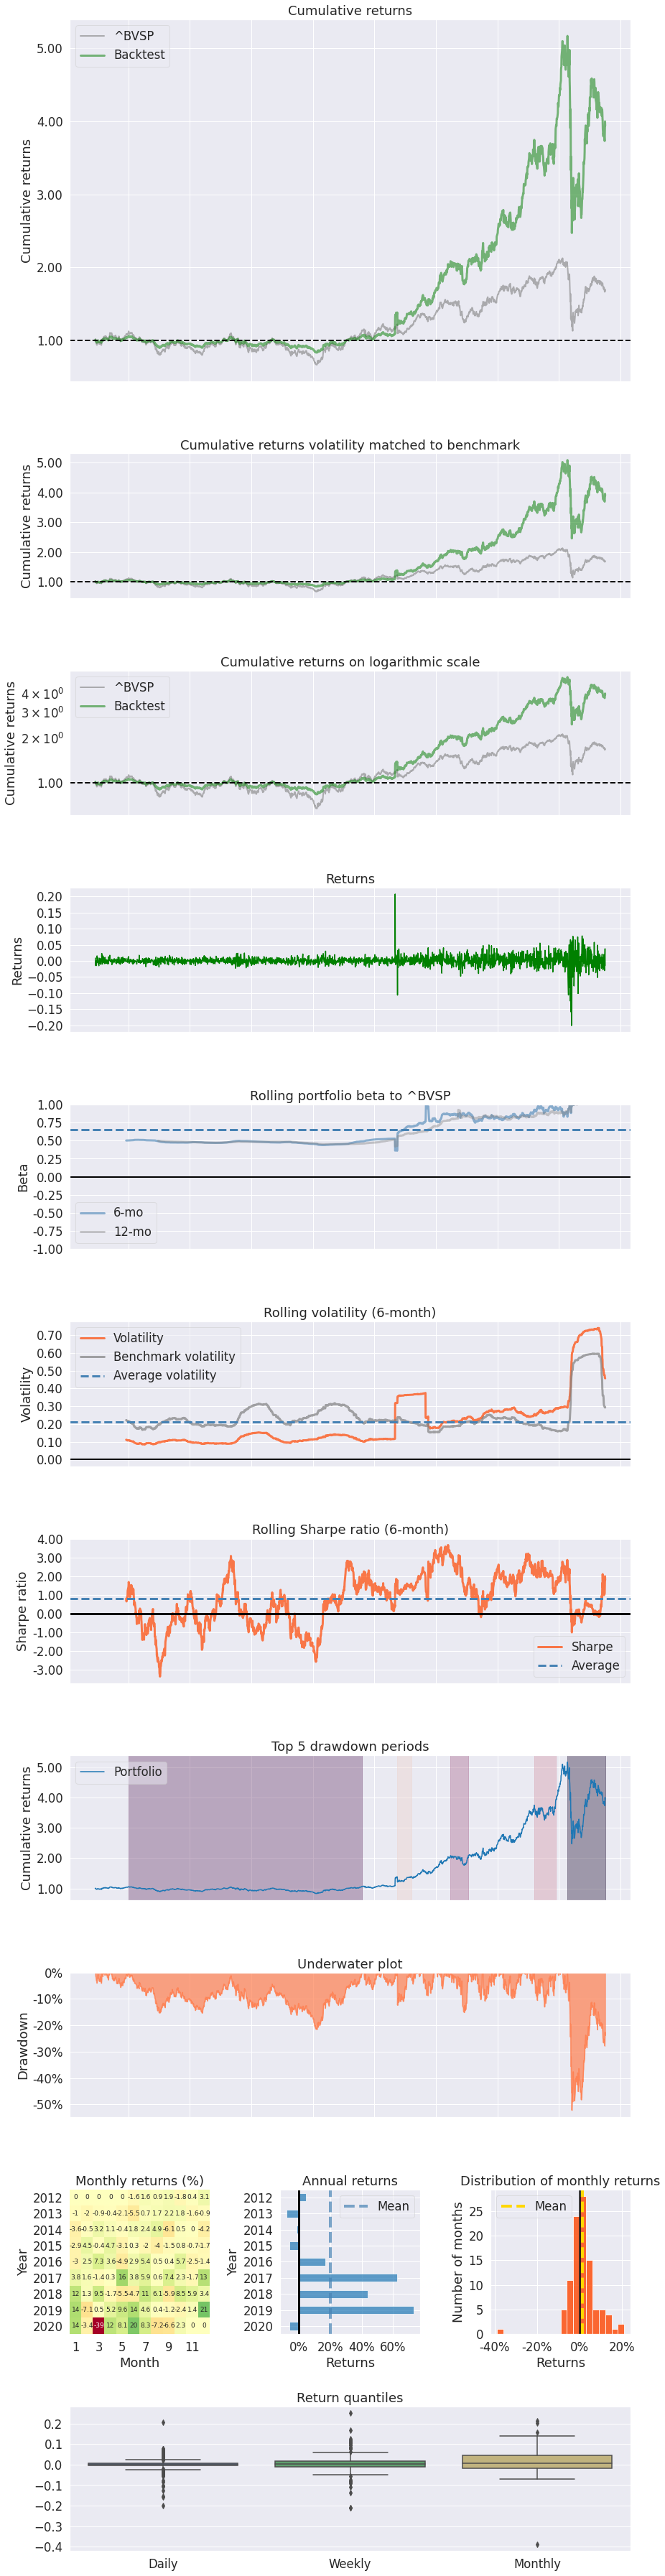

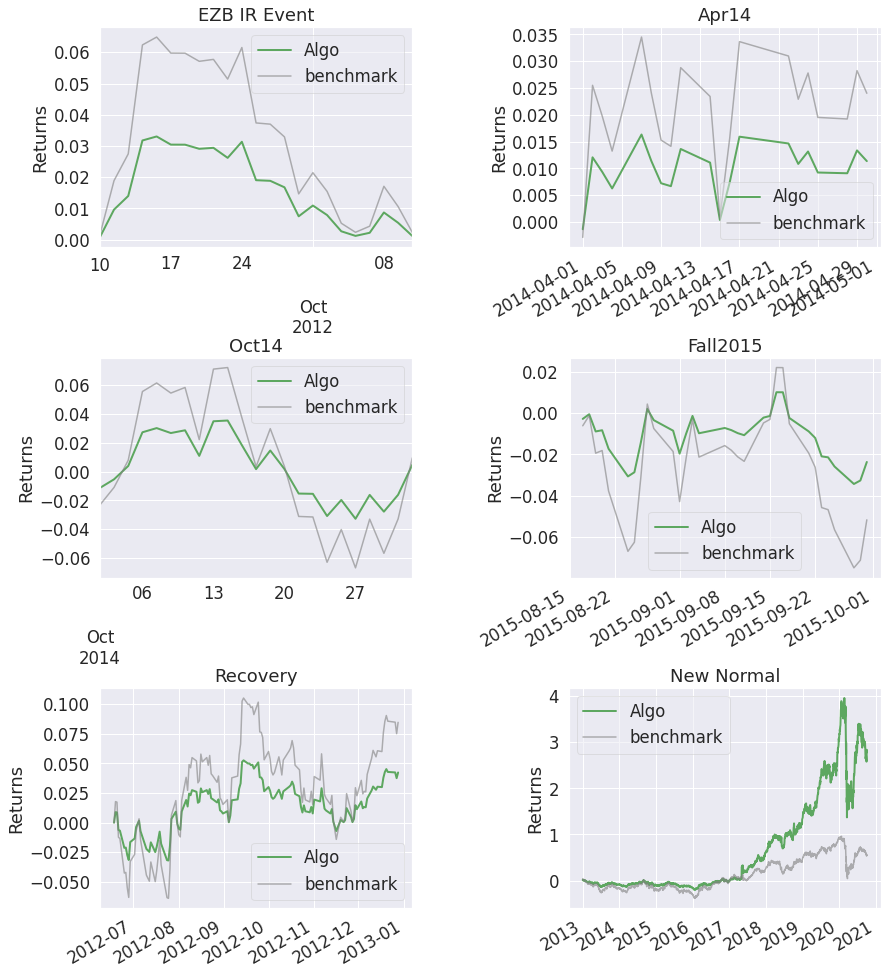

In [10]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


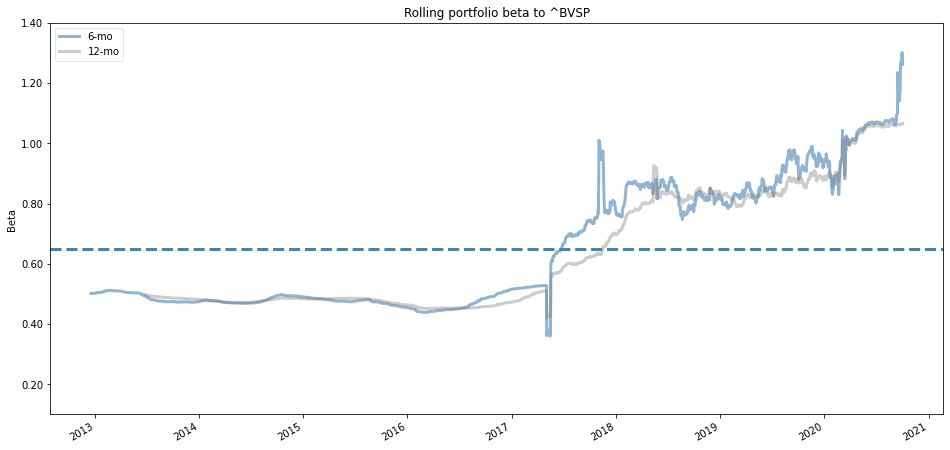

In [13]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.1, 1.4));